## **VISÃO COMPUTACIONAL - AULA 14**

**Objetivos da aula:**

*   apresentar o conceito de feature
*   praticar com detecção de features
*   praticar com homografias


**FEATURES**

Considere a imagem mostrada abaixo:

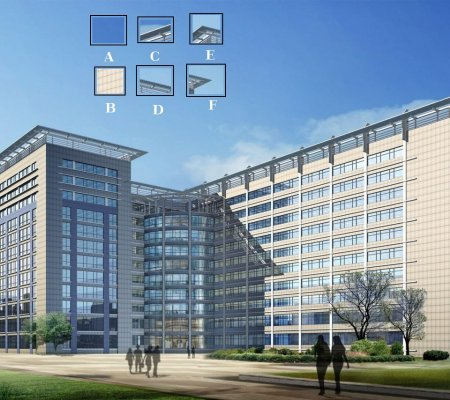

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
imagem = cv.imread('features.jpg')
cv2_imshow(imagem)

As subimagens A,B,C,D,E e F são chamados de **features** (**detalhes**) da imagem. Nestas features, temos dois problemas importantes:


*   Como reconhecer as features ?
*   Como encontrar correspondências entre as features ?

+


**DETECÇÃO DE FEATURES**

Uma das features mais comuns de ser detectar são os **cantos** (**corners**). Corners são regiões de grande variação de intensidade em todas as direções. 

Um dos detectores de corners mais conhecido é o Detector de Corners Harry (Harry Corner Detector). Neste detector, para cada ponto (x,y) da imagem, associamos uma função que mede o deslocamento de intensidade $E(u,v)$ numa direção $(u,v)$:




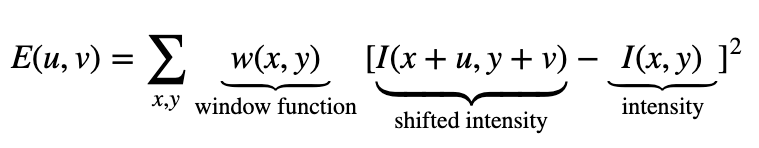

In [ ]:
imagem = cv.imread('harris.png')
cv2_imshow(imagem)

Esta função pode ser colocada na seguinte forma matricial:

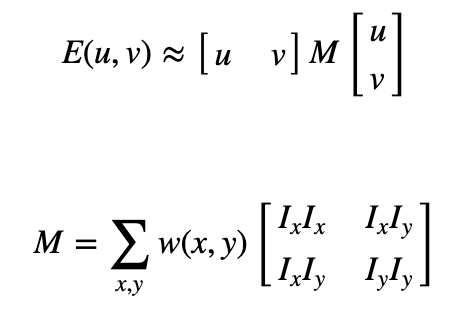

In [ ]:
imagem = cv.imread('harrismat.png')
cv2_imshow(imagem)

$I_{x}$ e $I_{y}$ são as derivadas da imagems na direções $x,y$ repectivamente. Associada à matriz $M$, definimos o valor $R=det(M)-k \times traço(M)$.

Supondo que $λ_{1}$ e $λ_{2}$ sejam os auto-valores de $M$, temos que:



*   $det(M)=λ_{1}\times λ_{2}$
*   $traço(M)=λ_{1}+λ_{2}$

Temos alguns casos teóricos para resolver inicialmente:


*   Quando R é pequeno, se λ1 e λ2 forem pequenos, a região é flat. 
*   Quando R é grande,  a região é um corner. 
*   Quando R<0, que acontece com $λ_{1}>>λ2$, a região é uma aresta (edge).

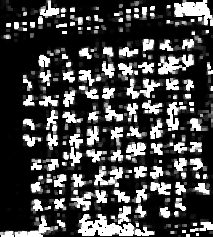

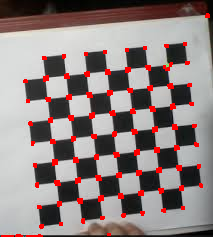

In [ ]:
import numpy as np
filename = 'chess.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04) #Documentação: https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345
dst = cv.dilate(dst,None)
cv2_imshow(dst)
print("")
img[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img)

**EXERCÍCIO**

Utilizando Morfologia Matemática, melhore a qualidade dos corners detectados pelo algoritmo acima.

In [ ]:
import numpy as np
filename = 'chess.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
gray = np.float32(gray)
dst = cv.cornerHarris(gray,2,3,0.04) #Documentação: https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345
dst = cv.dilate(dst,None)
cv2_imshow(dst)
print("")
img[dst>0.01*dst.max()]=[0,0,255]
cv2_imshow(img)

**EXERCÍCIO**

Encontre os corners da imagem abaixo. A partir do resultado, discuta se é possível contar o número de janelas desta construção.

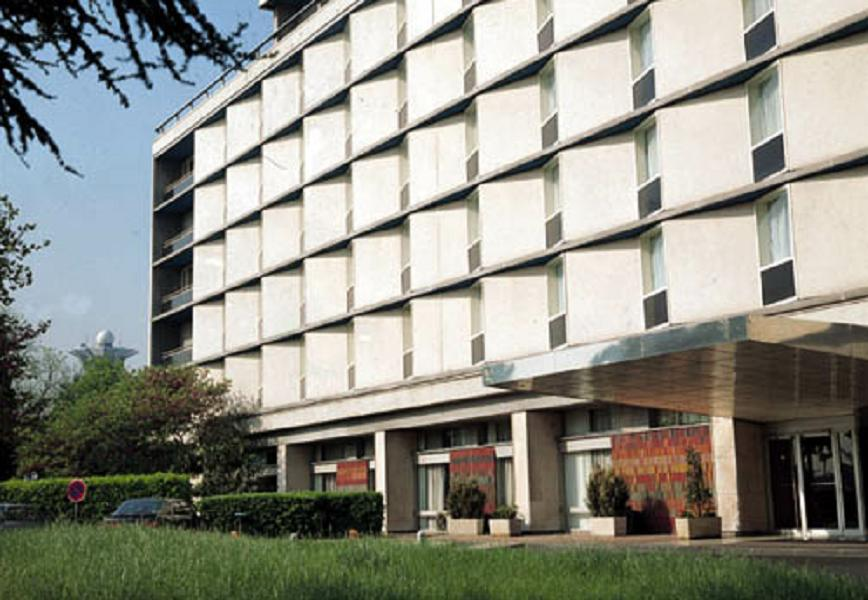

In [ ]:
imagem = cv.imread('building.jpg')
cv2_imshow(imagem)

**CORRESPONDÊNCIAS DE FEATURES**

Duas features são **correpondentes** se possuem **características semelhantes** (cor, textura, etc). A obtenção de correspondêcias entre features é conhecida como **homografia**. Por exemplo, queremos saber qual a correspondência entre o espaço de busca (imagem) e um padrão desejado (almofada).

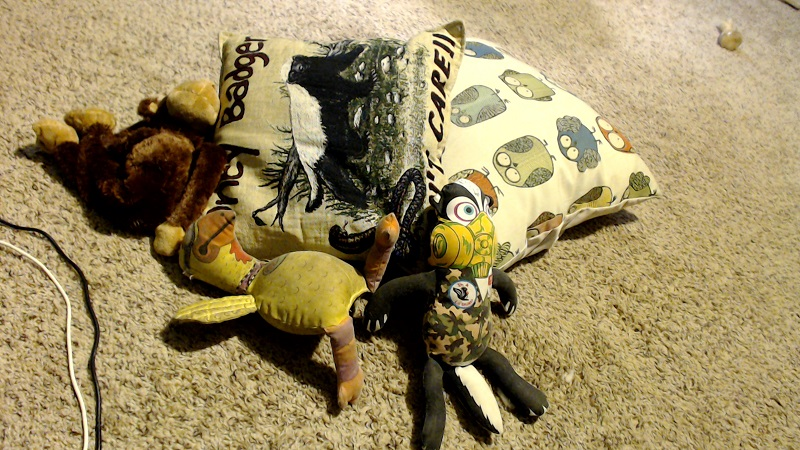

In [ ]:
imagem = cv.imread('image-homografia.jpg')
cv2_imshow(imagem)

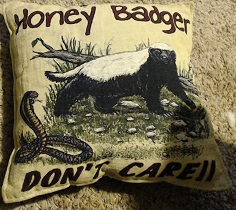

In [ ]:
imagem = cv.imread('image-template-homografia.jpg')
cv2_imshow(imagem)

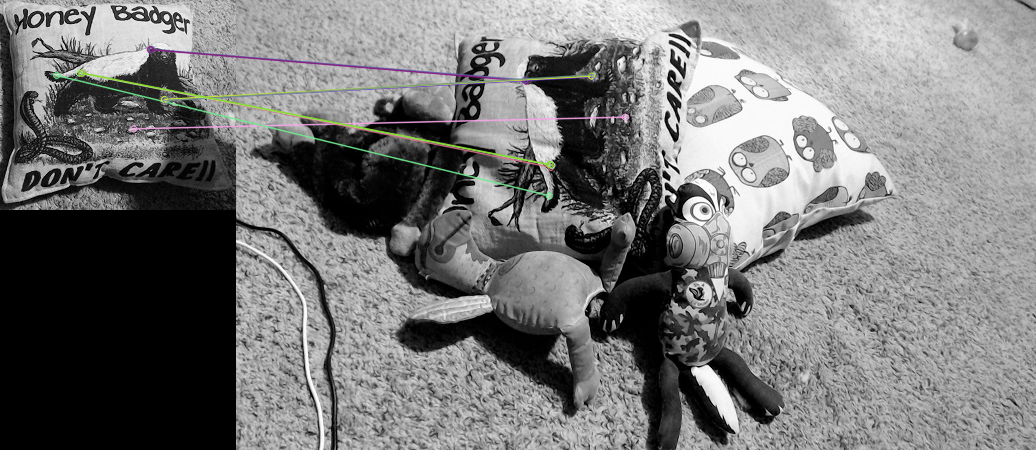

In [ ]:
img1 = cv.imread('image-template-homografia.jpg',0)
img2 = cv.imread('image-homografia.jpg',0)
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
cv2_imshow(img3)

**EXERCÍCIO**

Verifique se, alterando os parâmetros da chamada cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True) conseguimos aumentar o número de correspondências na imagem acima.

In [ ]:
img1 = cv.imread('image-template-homografia.jpg',0)
img2 = cv.imread('image-homografia.jpg',0)
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1,des2)
matches = sorted(matches, key = lambda x:x.distance)
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)
cv2_imshow(img3)